# Prediksi Gangguan Bipolar Menggunakan Pohon Keputusan

## Import Library

In [ ]:
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.metrics as metric
from IPython.display import Image, display

import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import graphviz
import pydotplus

## Import Data

In [ ]:
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/MyDrive/dataset/Mentalillness.csv')
dataset

Mounted at /content/drive


,ID,Inflated self-esteem,Distractibility,Increase in goal-directed activity,Excessive involvement in activities with high potential for painful consequences,Racing thoughts,Decreased need for sleep,More talkative than usual,Disorganized thinking or speech,Intrusive memories or flashbacks,...,Sleep disturbance.1,More than one month of disturbance,The disturbance causes clinically significant distress,The disturbance is not substance induced,Intrusive memories or flashback,Bipolar disorder,Schizophrenia,Depression,Anxiety disorder,PTSD
0,1,0,1,1,0,1,1,0,0,1,...,1,0,0,0,0,1,1,1,1,0
1,2,0,1,0,0,1,1,1,0,0,...,1,1,0,0,1,1,1,0,0,0
2,3,1,0,1,0,0,0,0,1,0,...,1,1,1,1,1,0,1,1,0,1
3,4,0,0,1,0,0,1,1,0,1,...,0,0,1,1,1,1,0,0,0,0
4,5,1,1,0,0,1,1,1,0,0,...,0,1,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3748,3749,1,1,1,0,0,1,1,1,0,...,1,0,1,1,1,1,1,1,0,0
3749,3750,0,1,1,0,1,1,0,0,1,...,1,1,1,0,1,1,1,1,1,0
3750,3751,1,1,1,0,1,1,1,0,0,...,1,1,0,1,1,1,1,1,1,0
3751,3752,1,1,0,0,0,0,0,0,1,...,1,0,1,0,1,0,1,1,1,0


In [ ]:
dataset.isna().sum().any()

False

karena tidak terdapat data kosong maka kami tidak melakukan data cleaning

## Feature Selection

In [ ]:
jumlah_id=len(dataset["ID"].unique())
print(f"ID UNIK: {jumlah_id}")
#karena ID bukan merupakan atribut unik dan tidak penting maka akan dihapus
data=dataset.loc[:,~dataset.columns.isin(["ID"])]
data[:5]

ID UNIK: 3753


,Inflated self-esteem,Distractibility,Increase in goal-directed activity,Excessive involvement in activities with high potential for painful consequences,Racing thoughts,Decreased need for sleep,More talkative than usual,Disorganized thinking or speech,Intrusive memories or flashbacks,Diminished emotional expression,...,Sleep disturbance.1,More than one month of disturbance,The disturbance causes clinically significant distress,The disturbance is not substance induced,Intrusive memories or flashback,Bipolar disorder,Schizophrenia,Depression,Anxiety disorder,PTSD
0,0,1,1,0,1,1,0,0,1,0,...,1,0,0,0,0,1,1,1,1,0
1,0,1,0,0,1,1,1,0,0,1,...,1,1,0,0,1,1,1,0,0,0
2,1,0,1,0,0,0,0,1,0,0,...,1,1,1,1,1,0,1,1,0,1
3,0,0,1,0,0,1,1,0,1,1,...,0,0,1,1,1,1,0,0,0,0
4,1,1,0,0,1,1,1,0,0,1,...,0,1,0,1,0,1,1,0,1,0


In [ ]:
## Mengubah nama kolum menjadi angka agar tidak kebingungan dan tidak terlalu panjang
columns= [value for value in data.columns]
encoder = LabelEncoder()
y_encoded=list(encoder.fit_transform(columns))
y_mapping_encoded = dict(zip(encoder.transform(encoder.classes_),encoder.classes_))
data_angka= data.rename(columns= {old_name: f'{new_name}' for old_name, new_name in zip(columns, y_encoded)},inplace=False)
y_mapping_encoded

{0: '1 month duration',
 1: '6 month duration',
 2: 'Angry outburst',
 3: 'Anxiety disorder',
 4: 'Avoidance of external reminders of traumatic event',
 5: 'Avoidance of reminders of traumatic event',
 6: 'Bipolar disorder',
 7: 'Catatonic behavior',
 8: 'Concentration issues',
 9: 'Decreased need for sleep',
 10: 'Delusions',
 11: 'Depressed mood',
 12: 'Depression',
 13: 'Difficulty concentrating',
 14: 'Difficulty concentrating or making decisions',
 15: 'Diminished emotional expression',
 16: 'Diminished interest',
 17: 'Disorganized thinking or speech',
 18: 'Dissociative reaction',
 19: 'Distractibility',
 20: 'Exaggerated startle response',
 21: 'Excessive involvement in activities with high potential for painful consequences',
 22: 'Excessive worry or fear',
 23: 'Experiencing traumatic event',
 24: 'Fatigue',
 25: 'Fatigue or loss of energy',
 26: 'Feeling of detachment',
 27: 'Hallucinations',
 28: 'Hypervigilance',
 29: 'Increase in goal-directed activity',
 30: 'Inflated se

In [ ]:
data_angka[:5]

,30,19,29,21,46,9,37,17,33,15,...,52,38,53,54,32,6,50,12,3,39
0,0,1,1,0,1,1,0,0,1,0,...,1,0,0,0,0,1,1,1,1,0
1,0,1,0,0,1,1,1,0,0,1,...,1,1,0,0,1,1,1,0,0,0
2,1,0,1,0,0,0,0,1,0,0,...,1,1,1,1,1,0,1,1,0,1
3,0,0,1,0,0,1,1,0,1,1,...,0,0,1,1,1,1,0,0,0,0
4,1,1,0,0,1,1,1,0,0,1,...,0,1,0,1,0,1,1,0,1,0


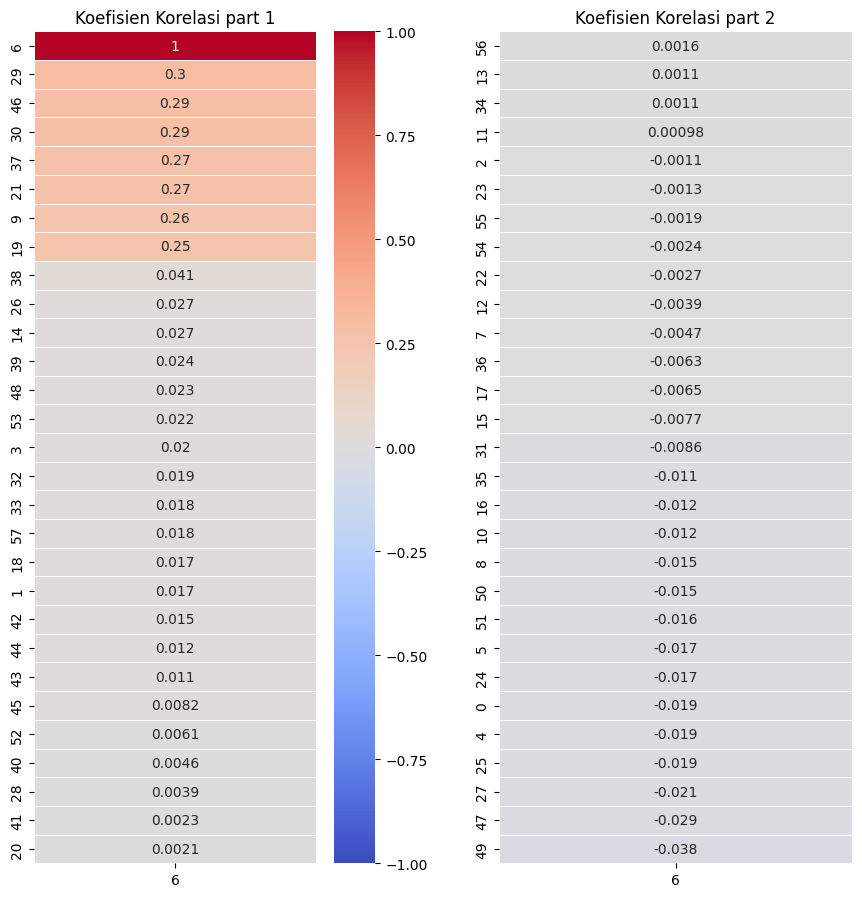

In [ ]:
cor_matrix = data_angka.corr()[['6']].sort_values(by='6', ascending=False)
fig,axes=plt.subplots(1,2,figsize=(10,10))
fig.tight_layout(pad=5.0)
sns.heatmap(cor_matrix.iloc[:len(cor_matrix) // 2], annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, ax=axes[0])
sns.heatmap(cor_matrix.iloc[len(cor_matrix) // 2:], annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, ax=axes[1],cbar=False)
axes[0].set_title("Koefisien Korelasi part 1")
axes[1].set_title("Koefisien Korelasi part 2")
plt.show()

Pada inputan 1 digunakan atribut yang korelasinya diatas 0.2 yaitu [29, 46, 30 37, 21, 9, 19]

Pada inputan 2 digunakan atribut yang korelasinya diatas 0.27 yaitu ['29', '46', '30']

In [ ]:
data_input1=data_angka[['29', '46', '30', '37', '21', '9', '19']]
data_input2=data_angka[['29', '46', '30']]
data_output=data_angka[['6']]

## Split Data

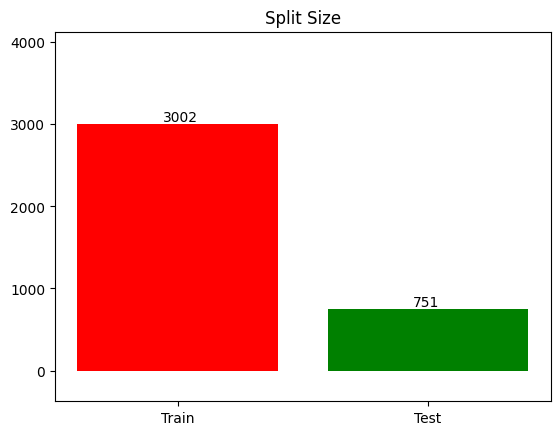

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(data_input1, data_output, test_size=0.2, random_state=40)
x_train2, x_test2, y_train2, y_test2 = train_test_split(data_input2, data_output, test_size=0.2, random_state=30)
bar_label = ['Train','Test']
height=[len(x_train1),len(x_test1)]
low = min(height)
high = max(height)
plt.ylim(plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))]))
bars=plt.bar(bar_label,height, tick_label = bar_label,width = 0.8, color = ['red', 'green'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.34, yval+30, yval)
plt.title('Split Size')
plt.show()

## MODEL

### model input 1

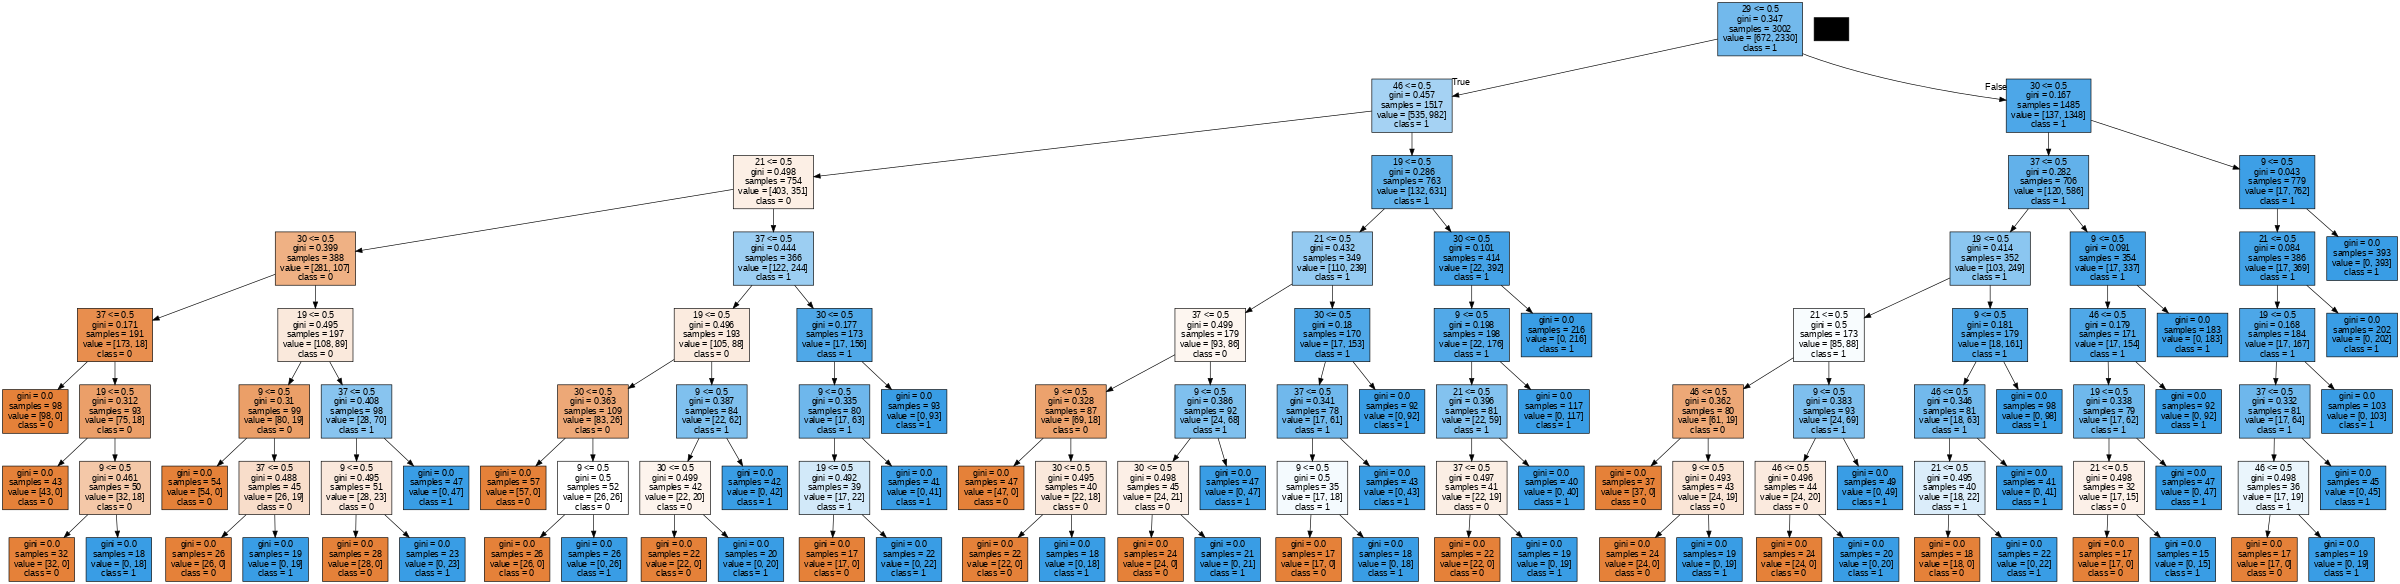

In [ ]:
dtc=DecisionTreeClassifier()
model1=dtc.fit(x_train1,y_train1)
dot_data = tree.export_graphviz(model1, out_file=None,
                           feature_names=list(data_input1.columns),
                           class_names=["0","1"],
                           filled=True)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('original_tree.png')
pydot_graph.set_size('"25,25!"')
pydot_graph.write_png('resized_tree.png')
display(Image('resized_tree.png'))

### model input 2

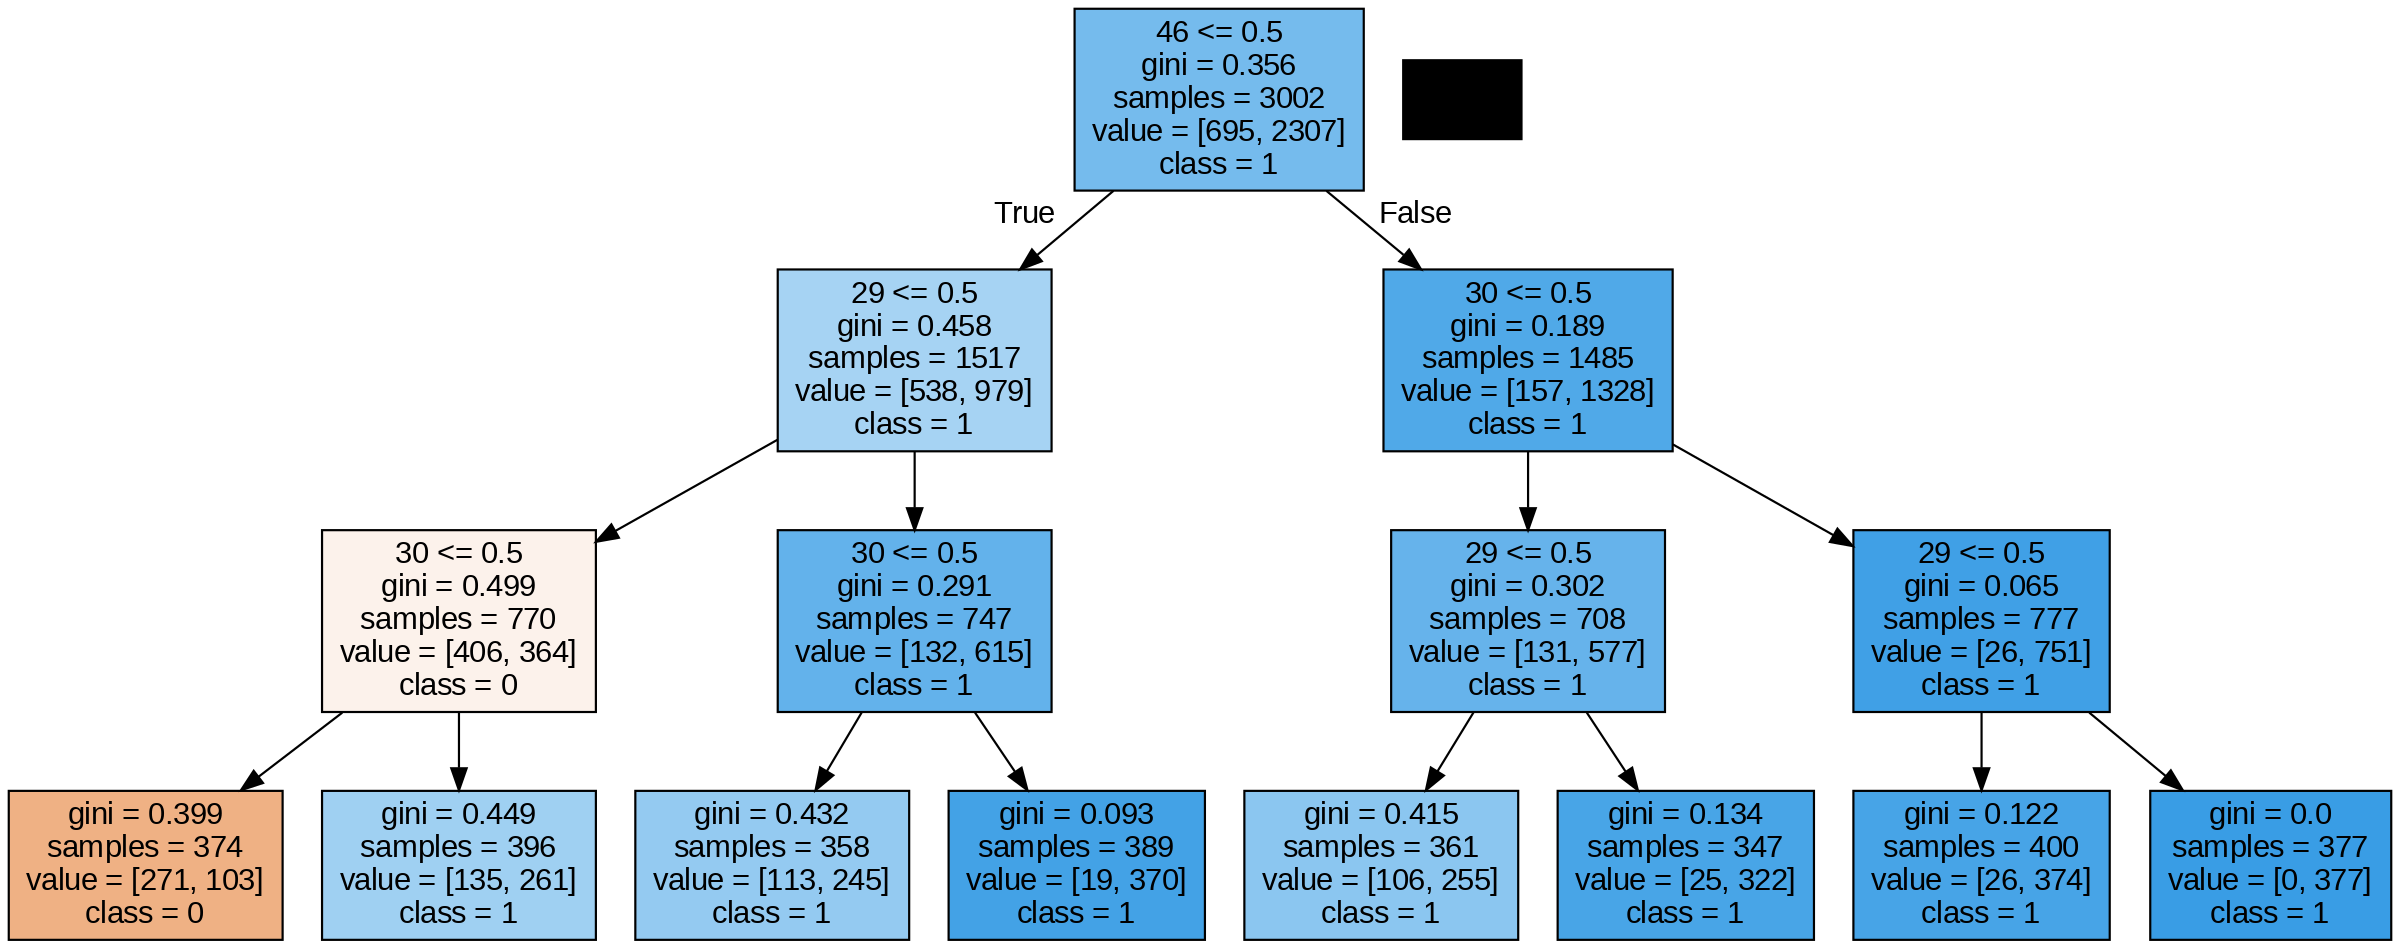

In [ ]:
godtc=DecisionTreeClassifier()
model2=godtc.fit(x_train2,y_train2)
dot_data2 = tree.export_graphviz(model2, out_file=None,
                           feature_names=list(data_input2.columns),
                           class_names=["0","1"],
                           filled=True)
pydot_graph2 = pydotplus.graph_from_dot_data(dot_data2)
pydot_graph2.write_png('original_tree.png')
pydot_graph2.set_size('"25,25!"')
pydot_graph2.write_png('resized_tree.png')
display(Image('resized_tree.png'))

## Evaluasi

In [ ]:
y_prediction1=model1.predict(x_test1)
y_prediction2=model2.predict(x_test2)
print("Akurasi Inputan 1:",metric.accuracy_score(y_test1, y_prediction1))
print("Akurasi Inputan 2:",metric.accuracy_score(y_test2, y_prediction2))

Akurasi Inputan 1: 1.0
Akurasi Inputan 2: 0.8468708388814914


In [ ]:
inputan1= list( map(y_mapping_encoded.get, (int(x) for x in (data_input1.columns.to_list()))) )
inputan2= list( map(y_mapping_encoded.get, (int(x) for x in (data_input2.columns.to_list()))) )
print(f"inputan1: {inputan1}")
print(f"inputan2: {inputan2}")

inputan1: ['Increase in goal-directed activity', 'Racing thoughts', 'Inflated self-esteem', 'More talkative than usual', 'Excessive involvement in activities with high potential for painful consequences', 'Decreased need for sleep', 'Distractibility']
inputan2: ['Increase in goal-directed activity', 'Racing thoughts', 'Inflated self-esteem']


### Disimpulkan akurasi menggunakan inputan 1 yaitu [Peningkatan aktivitas berdasarkan tujuan, 'Pikiran berpacu, Peningkatan Harga diri, Lebih banyak bicara dari biasanya, Keterlibatan berlebihan dalam aktivitas yang berpotensi menyakitkan, Penurunan kebutuhan tidur, Distraksibilitas] lebih baik dibandingkan hanya menggunakan 3 atribut inputan pada inputan 2